<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries and uploading the data

In [27]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition.pca import PCA
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot





In [2]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/BCPI_MONTHLY-sd-1972-01-01.csv'

data = pd.read_csv(url)
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe




           date  M.BCPI  M.BCNE   M.ENER  M.MTLS   M.FOPR  M.AGRI   M.FISH
0    1972-01-01  100.00  100.00   100.00  100.00   100.00  100.00   100.00
1    1972-02-01  100.40  100.53    99.78  100.74   100.12  101.20    88.89
2    1972-03-01  101.11  101.35   100.05  101.38   100.24  102.53    98.97
3    1972-04-01  101.16  101.45    99.84  101.21   100.95  102.08   103.10
4    1972-05-01  101.88  102.30   100.00  101.25   102.32  103.53    86.30
..          ...     ...     ...      ...     ...      ...     ...      ...
592  2021-05-01  603.08  524.90  1173.22  733.52  1101.94  310.20  1451.32
593  2021-06-01  606.63  488.98  1289.50  720.94   838.80  306.31  1534.54
594  2021-07-01  593.87  455.44  1334.47  730.52   536.88  321.88  1737.96
595  2021-08-01  568.19  440.31  1261.77  738.36   437.00  328.36  1658.92
596  2021-09-01  596.69  446.58  1378.81  749.09   477.69  315.44  1718.73

[597 rows x 8 columns]


# Exploring the Dataset

In [3]:
df.dtypes
#checking the type of data

date       object
M.BCPI    float64
M.BCNE    float64
M.ENER    float64
M.MTLS    float64
M.FOPR    float64
M.AGRI    float64
M.FISH    float64
dtype: object

In [4]:
df.head(5)
# the first 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [5]:
df.tail(5)
#the last 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
592,2021-05-01,603.08,524.90,1173.22,733.52,1101.94,310.20,1451.32
593,2021-06-01,606.63,488.98,1289.50,720.94,838.80,306.31,1534.54
594,2021-07-01,593.87,455.44,1334.47,730.52,536.88,321.88,1737.96
595,2021-08-01,568.19,440.31,1261.77,738.36,437.00,328.36,1658.92
596,2021-09-01,596.69,446.58,1378.81,749.09,477.69,315.44,1718.73


In [6]:
#Describe the dataset 
df.describe()


,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,342.790369,253.76072,759.306265,360.757705,282.288224,191.433317,683.961642
std,148.170932,79.38940,477.890514,177.418661,107.034746,46.860202,403.135415
min,100.000000,100.00000,99.780000,100.000000,100.000000,100.000000,86.300000
25%,250.800000,197.67000,407.970000,237.160000,201.320000,160.550000,262.270000
50%,286.330000,232.47000,635.920000,283.060000,278.370000,178.300000,717.250000
75%,420.880000,320.50000,982.080000,536.440000,337.070000,210.920000,985.100000
max,881.310000,524.90000,2755.750000,779.920000,1101.940000,328.360000,1831.730000


In [7]:
#Renaming columns for ease
df_new = df.rename(columns={'M.BCPI': 'Total_CPI', 'M.AGRI': 'CPI_Agri', 'M.BCNE': 'CPI_NonEner', 'M.ENER': 'CPI_Ener','M.MTLS': 'CPI_Metals', 'M.FOPR': 'CPI_Forst', 'M.FISH': 'CPI_Fish'})
print(df_new)

           date  Total_CPI  CPI_NonEner  ...  CPI_Forst  CPI_Agri  CPI_Fish
0    1972-01-01     100.00       100.00  ...     100.00    100.00    100.00
1    1972-02-01     100.40       100.53  ...     100.12    101.20     88.89
2    1972-03-01     101.11       101.35  ...     100.24    102.53     98.97
3    1972-04-01     101.16       101.45  ...     100.95    102.08    103.10
4    1972-05-01     101.88       102.30  ...     102.32    103.53     86.30
..          ...        ...          ...  ...        ...       ...       ...
592  2021-05-01     603.08       524.90  ...    1101.94    310.20   1451.32
593  2021-06-01     606.63       488.98  ...     838.80    306.31   1534.54
594  2021-07-01     593.87       455.44  ...     536.88    321.88   1737.96
595  2021-08-01     568.19       440.31  ...     437.00    328.36   1658.92
596  2021-09-01     596.69       446.58  ...     477.69    315.44   1718.73

[597 rows x 8 columns]


In [8]:
print("The new columns in the Dataset are:\n",df_new.columns)

The new columns in the Dataset are:
 Index(['date', 'Total_CPI', 'CPI_NonEner', 'CPI_Ener', 'CPI_Metals',
       'CPI_Forst', 'CPI_Agri', 'CPI_Fish'],
      dtype='object')


In [9]:
#Checking the skewness and kurtosis of Total CPI, moderately skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['Total_CPI'].skew())
print("Kurtosis: %f" % df_new['Total_CPI'].kurt())

Skewness: 0.950204
Kurtosis: 0.217021


In [10]:
#Checking the skewness and kurtosis of CPI Energy, heavily skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Ener'].skew())
print("Kurtosis: %f" % df_new['CPI_Ener'].kurt())


Skewness: 1.053477
Kurtosis: 0.698279


In [11]:
#Checking the skewness and kurtosis of CPI Metals, moderately skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Metals'].skew())
print("Kurtosis: %f" % df_new['CPI_Metals'].kurt())

Skewness: 0.727674
Kurtosis: -0.783938


In [12]:
#Checking the skewness and kurtosis of CPI Energy , heavilty skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Agri'].skew())
print("Kurtosis: %f" % df_new['CPI_Agri'].kurt())

Skewness: 1.081845
Kurtosis: 0.736573


In [13]:
#Checking the skewness and kurtosis of CPI Forestry, heavilty skewed, kurtosis at extreemes distribution thin and tall lepyokurtic
print("Skewness: %f" % df_new['CPI_Forst'].skew())
print("Kurtosis: %f" % df_new['CPI_Forst'].kurt())

Skewness: 1.959044
Kurtosis: 9.805375


In [14]:
#Checking the skewness and kurtosis of CPI Fish, fairly skewed, kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Fish'].skew())
print("Kurtosis: %f" % df_new['CPI_Fish'].kurt())

Skewness: 0.170690
Kurtosis: -1.106872


In [15]:
min(df_new.Total_CPI)
#checking the year and month where the CPI was lowest

100.0

In [16]:
max(df_new.Total_CPI)

#checking the year and month where the CPI was highest

881.31

In [17]:
max(df_new.date)

'2021-09-01'

In [18]:
df_new.isnull().sum()
#checking for null values

date           0
Total_CPI      0
CPI_NonEner    0
CPI_Ener       0
CPI_Metals     0
CPI_Forst      0
CPI_Agri       0
CPI_Fish       0
dtype: int64

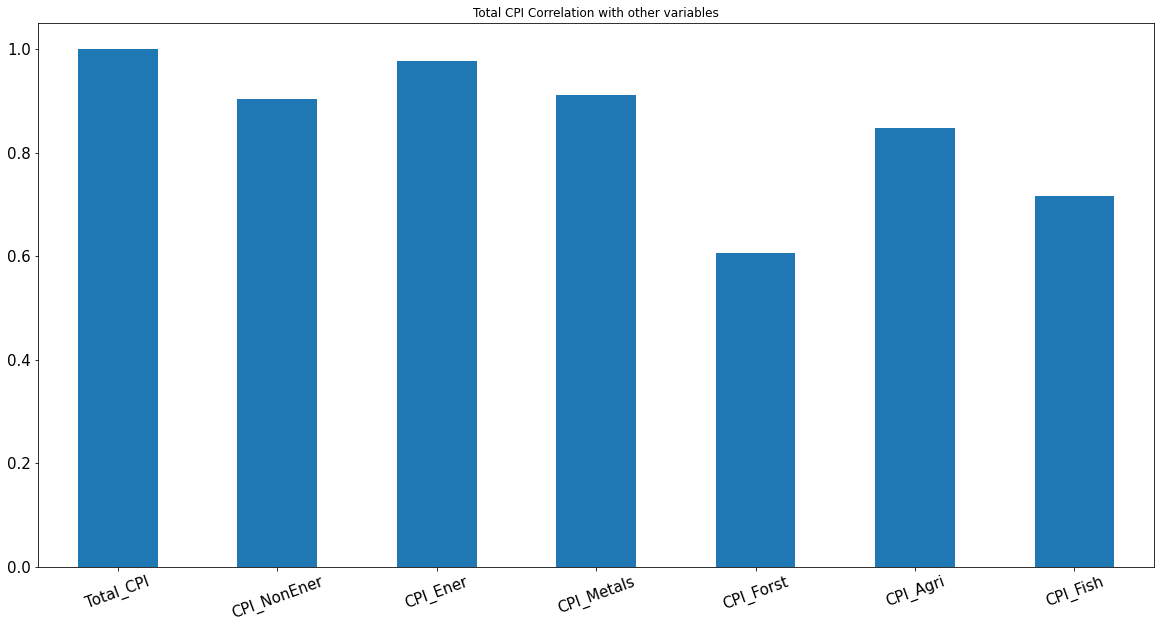

In [19]:
df_new.corrwith(df_new.Total_CPI).plot.bar(
figsize = (20, 10), title = "Total CPI Correlation with other variables", fontsize = 15, rot = 20, grid = False)

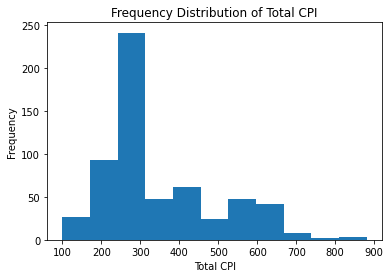

In [20]:
plt.hist(x=df_new['Total_CPI'], bins=11)
plt.xlabel("Total CPI")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Total CPI")
plt.show()

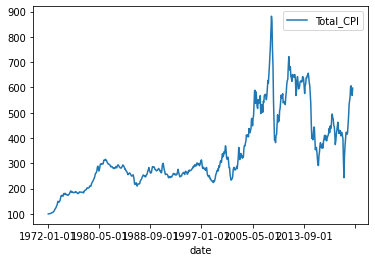

In [21]:
ax = df_new.plot(x='date', y='Total_CPI', rot=0)
plt.legend()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.903644,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_NonEner,0.903644,1.000000,0.804170,0.967183,0.822376,0.874488,0.830922
CPI_Ener,0.977267,0.804170,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.967183,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.822376,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.874488,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.830922,0.631449,0.763231,0.810035,0.598726,1.000000


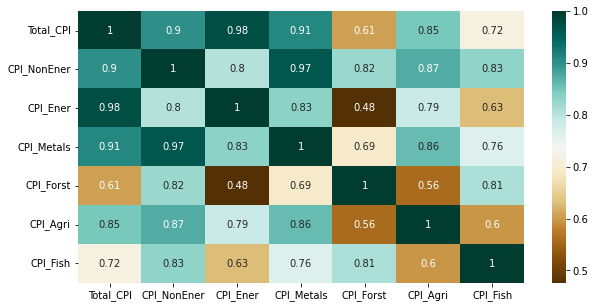

In [22]:
plt.figure(figsize=(10,5))
cor= df_new.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [23]:
df1 = df_new.drop(['CPI_NonEner', 'date'], axis=1)
df1.head()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
0,100.00,100.00,100.00,100.00,100.00,100.00
1,100.40,99.78,100.74,100.12,101.20,88.89
2,101.11,100.05,101.38,100.24,102.53,98.97
3,101.16,99.84,101.21,100.95,102.08,103.10
4,101.88,100.00,101.25,102.32,103.53,86.30


ValueError: ignored

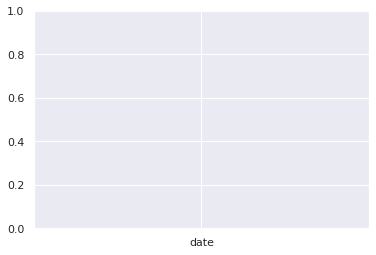

In [28]:
plt.plot( 'date', 'Total_CPI', data=df1, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'date', 'CPI_Agri', data=df1, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'CPI_Ener', data=df1, marker='', color='red', linewidth=2)
plt.plot( 'date', 'CPI_Metals', data=df1, marker='', color='grey', linewidth=2)
plt.plot( 'date', 'CPI_Forst', data=df1, marker='', color='black', linewidth=2)
plt.plot( 'date', 'CPI_Fish', data=df1, marker='', color='purple', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

In [25]:

df1.corr()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_Ener,0.977267,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.631449,0.763231,0.810035,0.598726,1.000000


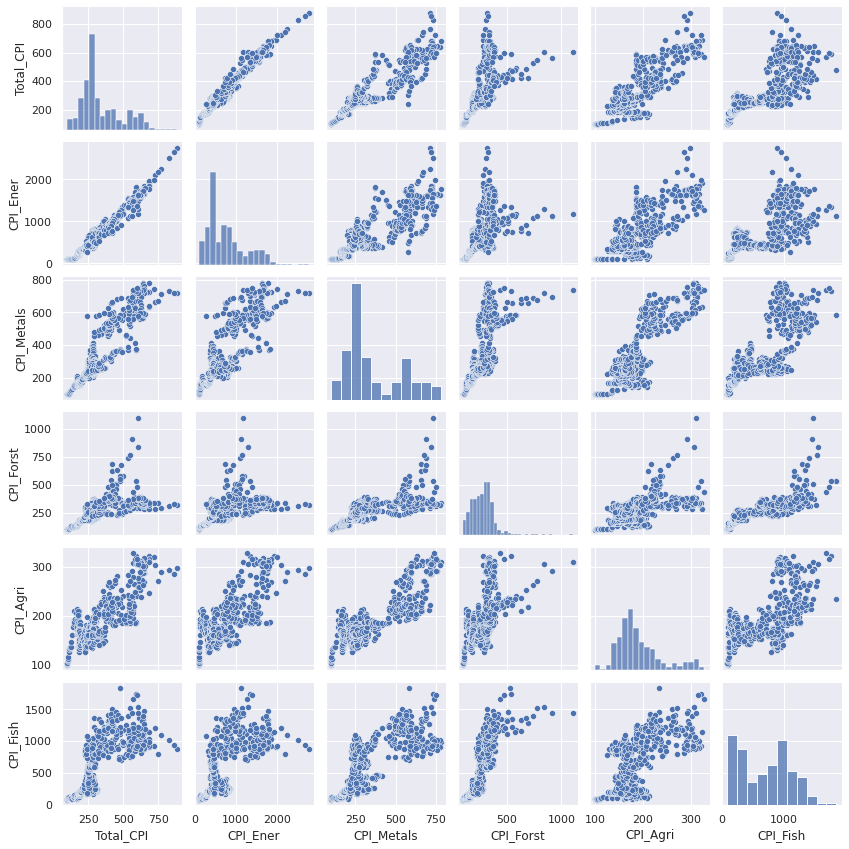

In [26]:

sns.set()
cols = ['Total_CPI', 'CPI_Ener', 'CPI_Metals', 'CPI_Forst', 'CPI_Agri', 'CPI_Fish']
sns.pairplot(df1[cols], height = 2)
plt.show()

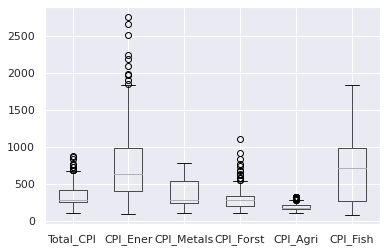

In [29]:
np.random.seed(19680801)

boxplot = df1.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



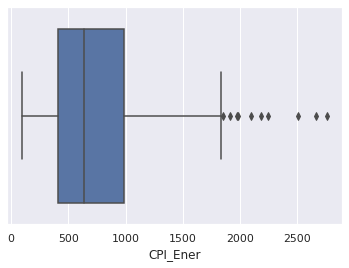

In [30]:
sns.boxplot(df1['CPI_Ener'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



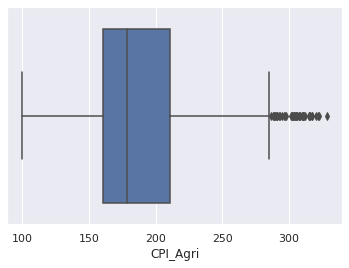

In [31]:
sns.boxplot(df1['CPI_Agri'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



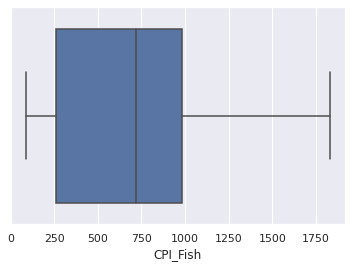

In [32]:
sns.boxplot(df1['CPI_Fish'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



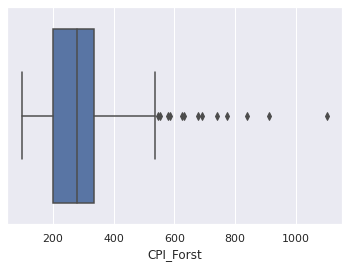

In [33]:
sns.boxplot(df1['CPI_Forst'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



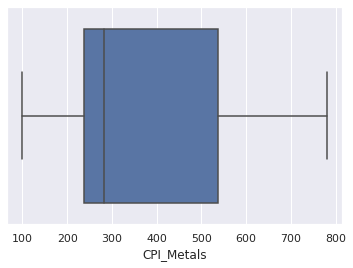

In [34]:
sns.boxplot(df1['CPI_Metals'])



In [35]:
X = df1[['CPI_Ener','CPI_Agri', 'CPI_Metals', 'CPI_Forst', 'CPI_Fish']] 
Y = df1['Total_CPI']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_CPI_Ener = 1400
New_CPI_Agri = 320
New_CPI_Metals = 800
New_CPI_Forst = 480
New_CPI_Fish = 2000
print ('Predicted Total CPI: \n', regr.predict([[New_CPI_Ener ,New_CPI_Agri, New_CPI_Metals, New_CPI_Forst, New_CPI_Fish ]]))



Intercept: 
 40.60803194721058
Coefficients: 
 [ 2.27563607e-01  1.93301242e-01  1.47859235e-01  1.38559609e-01
 -9.87455840e-05]
Predicted Total CPI: 
 [605.65198873]


In [36]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total_CPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:51:18   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4868.
Df Residuals:                     591   BIC:                             4895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6080      3.275     12.400      0.0

In [37]:
df2 = df1.drop(['CPI_Fish'], axis=1)
df2.head()

,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri
0,100.00,100.00,100.00,100.00,100.00
1,100.40,99.78,100.74,100.12,101.20
2,101.11,100.05,101.38,100.24,102.53
3,101.16,99.84,101.21,100.95,102.08
4,101.88,100.00,101.25,102.32,103.53


In [38]:
X2 = df1[['CPI_Ener','CPI_Agri', 'CPI_Metals', 'CPI_Forst']] 
Y2 = df1['Total_CPI']
 
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_CPI_Ener = 1400
New_CPI_Agri = 320
New_CPI_Metals = 800
New_CPI_Forst = 480

print ('Predicted Total CPI: \n', regr.predict([[New_CPI_Ener ,New_CPI_Agri, New_CPI_Metals, New_CPI_Forst ]]))

Intercept: 
 40.61078877612749
Coefficients: 
 [0.22754493 0.19346887 0.14778091 0.13834725]
Predicted Total CPI: 
 [605.71513715]


In [39]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total_CPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:51:18   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4868.
Df Residuals:                     591   BIC:                             4895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6080      3.275     12.400      0.0

In [55]:
# Labels are the values we want to predict
labels = np.array(df1['Total_CPI'])
# Remove the labels from the features
# axis 1 refers to the columns
df1= df1.drop('Total_CPI', axis = 1)
# Saving feature names for later use
feature_list = list(df1.columns)
# Convert to numpy array
df1 = np.array(df1)

In [56]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df1, labels, test_size = 0.25, random_state = 42)

In [42]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (447, 8)
Training Labels Shape: (447,)
Testing Features Shape: (150, 8)
Testing Labels Shape: (150,)


In [57]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [58]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')


Mean Absolute Error: 6.22 dollars.


In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.42 %.


In [60]:
# Import tools needed for visualization

# Pull out one tree from the forest
tree = rf.estimators_[5]


# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [61]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


In [62]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CPI_Ener             Importance: 0.92
Variable: CPI_Metals           Importance: 0.04
Variable: CPI_Forst            Importance: 0.03
Variable: CPI_Agri             Importance: 0.01
Variable: CPI_Fish             Importance: 0.0


In [63]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('CPI_Ener'),feature_list.index('CPI_Metals'), feature_list.index('CPI_Forst')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 6.27 dollars.
Accuracy: 98.35 %.


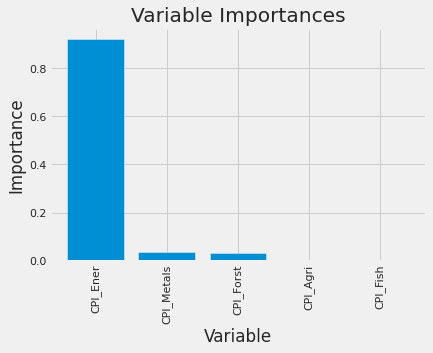

In [64]:
# Import matplotlib for plotting 

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');